In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import time
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
import copy
import scipy
import pickle

from scipy.stats import nbinom

from scipy.optimize import fsolve

In [2]:
def G(z, mu, t):
    return ((1 + mu)**(-1 - t) * ((z * mu)**(1 + t) - (1 + mu)**(1 + t)))/(-1 + (-1 + z) * mu)

def f(d, mu, t):
    return G(d, mu, t) - d

def get_extinction_prob_finite(mu,t):
    d_initial_guess = 0.5
    d_solution = fsolve(f, d_initial_guess, args=(mu,t))
    return d_solution[0]

Text(0, 0.5, '$d_n$ (extinction probability)')

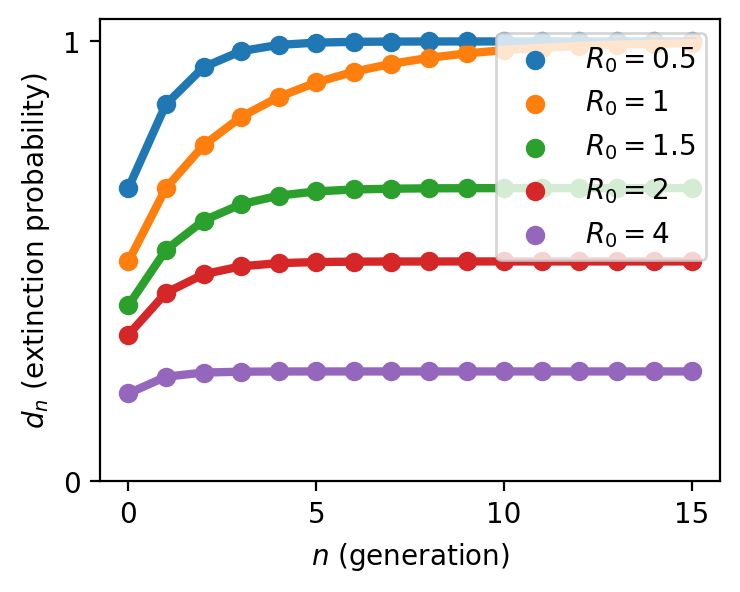

In [3]:
gens_in = np.arange(0,15.01,1)
R0s_in = [0.5, 1, 1.5, 2, 4]
R0s = []
lw=3

%matplotlib inline

plt.figure(figsize=(4, 3), dpi=200)


for R0 in R0s_in:
    ds = []
    gens = []
    for g in gens_in:
        ds.append(min(1,get_extinction_prob_finite(R0, g)))
        R0s.append(R0)
        gens.append(g)
    #plt.plot(ds, label=r'$R_0=$' + f'{np.round(R0,2)}', linewidth=lw)
    plt.plot(ds, linewidth=lw)
    plt.scatter(gens, ds, label=r'$R_0=$' + f'{np.round(R0,2)}')


plt.ylim([0,1.05])
plt.yticks([0, 1])
plt.xticks([0, 5, 10, 15])
plt.legend(loc='upper right')
plt.xlabel(r"$n$ (generation)")
plt.ylabel(r"$d_n$ (extinction probability)")

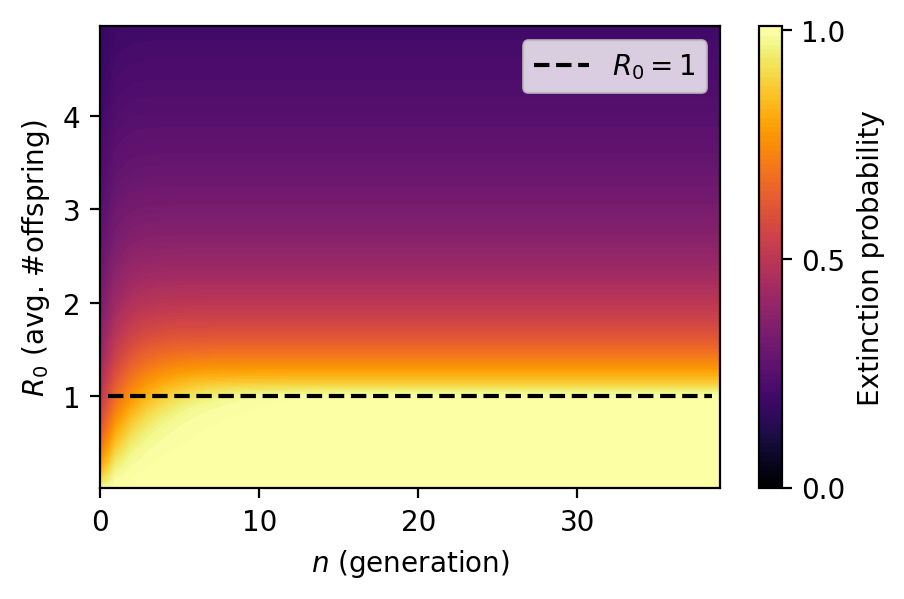

In [5]:
ds = []
gens = []
gens_in = np.arange(0,40,1)
R0s_in = np.arange(0.01,5,0.05)
R0s = []
for R0 in R0s_in:
    for g in gens_in:
        ds.append(get_extinction_prob_finite(R0, g))
        R0s.append(R0)
        gens.append(g)

from scipy.interpolate import griddata
# Create grid coordinates for contour plot
n_grid, R0_grid = np.mgrid[min(gens):max(gens):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
d_grid = griddata((gens, R0s), ds, (n_grid, R0_grid), method='linear')

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(n_grid, R0_grid, d_grid, levels=np.arange(-0.002, 1.011, 0.01), cmap='inferno', vmin=0, vmax=1)
cbar = plt.colorbar(label=r'Extinction probability', ticks=np.arange(0, 1.0001, 0.5))
plt.clim(0,1)
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
#cbar.formatter.set_powerlimits((0, 0))
#cbar.formatter.set_useMathText(True)
plt.xlabel(r'$n$ (generation)')
plt.ylabel(r'$R_0$ (avg. #offspring)')
#plt.title('Extinction probability')
plt.plot([0.5,np.max(gens)-0.5],[1,1],'--', color='black', label=r'$R_0=1$')
plt.legend()
plt.show()

In [ ]:
|